In [1]:
import requests
import io
import pandas as pd

response = requests.get('http://bl.ocks.org/syntagmatic/raw/3150059/nutrients.csv')
file_object = io.StringIO(response.content.decode('utf-8'))

Open a Jupyter notebook and read in the Nutrient CSV file into a Pandas Dataframe

In [2]:
nutrients_df = pd.read_csv(file_object)
nutrients_df.head(3)

,name,group,protein (g),calcium (g),sodium (g),fiber (g),vitaminc (g),potassium (g),carbohydrate (g),sugars (g),fat (g),water (g),calories,saturated (g),monounsat (g),polyunsat (g),id
0,"Beverage, instant breakfast powder, chocolate,...",Dairy and Egg Products,19.9,0.285,0.385,0.4,0.0769,0.947,66.2,65.8,1.4,7.4,357.0,0.560,0.314,0.278,27481
1,"Beverage, instant breakfast powder, chocolate,...",Dairy and Egg Products,35.8,0.500,0.717,2.0,0.1380,1.705,41.0,39.0,5.1,7.4,358.0,2.162,1.189,1.027,27482
2,"Beverage, milkshake mix, dry, not chocolate",Dairy and Egg Products,23.5,0.880,0.780,1.6,0.0012,2.200,52.9,51.3,2.6,12.8,329.0,2.059,0.332,0.060,27483


Sort the dataframe by protein content (foods with the most protein at the top)

In [3]:
nutrients_df.sort_values(by='protein (g)', ascending = False).head(3)

,name,group,protein (g),calcium (g),sodium (g),fiber (g),vitaminc (g),potassium (g),carbohydrate (g),sugars (g),fat (g),water (g),calories,saturated (g),monounsat (g),polyunsat (g),id
5387,"Soy protein isolate, potassium type, crude pro...",Legumes and Legume Products,88.32,0.178,0.050,2.0,0.0,1.59,2.59,NaN,0.53,4.98,321.0,0.066,0.101,0.258,32868
5385,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE...",Legumes and Legume Products,87.75,0.200,1.188,NaN,0.0,0.10,NaN,NaN,4.00,4.42,388.0,0.871,0.671,1.729,32866
5384,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE...",Legumes and Legume Products,86.00,0.200,0.040,NaN,0.0,1.60,NaN,NaN,4.00,5.00,380.0,0.400,0.700,1.700,32865


Identify the food group that has the highest average protein content

In [4]:
# One way to solve this problem is using a for loop and the "groupby" function
protein_group_name = ''
max_protein_val = 0
for group_name, group_df in nutrients_df.groupby(['group']):
    ave_protein_in_current_group = group_df['protein (g)'].mean()
    if ave_protein_in_current_group > max_protein_val:
        max_protein_val = ave_protein_in_current_group
        protein_group_name = group_name
print('The food group with the most protein is {} at {} g protein per 100 g'.format(protein_group_name, max_protein_val))

The food group with the most protein is Beef Products at 24.763559870550168 g protein per 100 g


Identify the food group with the greatest variance in protein content

In [5]:
# You can call the std() function directly on the groupby() object, 
# and sort by the standard deviation values. The previous question could 
# have been answered using a similar approach. 
sorted_by_protein_variance_df = nutrients_df.groupby(['group']).std().sort_values(by='protein (g)', ascending=False)
print('The food group with the most variance in protein content is {}'.format(sorted_by_protein_variance_df.index[0]))

The food group with the most variance in protein content is Ethnic Foods


1. Create a new variable in your dataframe that indicates whether a food is healthy (above average in at least one category except sodium, sugar and fat), unhealthy (above average in sodium, sugar and fat, and not above average in anything else) or neutral.
2. Achieve this by writing a function which takes a row of the dataframe as input and returns one of those three labels
3. Create the new variable in your dataframe using apply() and your new function.

In [11]:
col_means = nutrients_df.mean()
delicious_list = ['sodium (g)', 'sugars (g)', 'fat (g)']
healthy_list = ['protein (g)', 'calcium (g)' , 'fiber (g)', 'vitaminc (g)', 'potassium (g)', 'carbohydrate (g)']

def decide_if_healthy(row):
    above_average_na_or_sugar_or_fat = False
    above_average_na_and_sugar_and_fat = False
    any_healthy_nutrient_above_average = False

    if row[delicious_list[0]] > col_means[delicious_list[0]] or \
       row[delicious_list[1]] > col_means[delicious_list[1]] or \
       row[delicious_list[2]] > col_means[delicious_list[2]]:
        above_average_na_or_sugar_or_fat = True
        
    if row[delicious_list[0]] > col_means[delicious_list[0]] and \
       row[delicious_list[1]] > col_means[delicious_list[1]] and \
       row[delicious_list[2]] > col_means[delicious_list[2]]:
        above_average_na_and_sugar_and_fat = True
    
    for healthy_nutrient in healthy_list:
        if row[healthy_nutrient] > col_means[healthy_nutrient]:
            any_healthy_nutrient_above_average = True
    
    if not above_average_na_or_sugar_or_fat and any_healthy_nutrient_above_average:
        return 'healthy'
    elif above_average_na_and_sugar_and_fat and not any_healthy_nutrient_above_average:
        return 'unhealthy'
    else:
        return 'neutral'

In [12]:
nutrients_df['healthy'] = nutrients_df.apply(decide_if_healthy, axis=1)

In [15]:
nutrients_df[nutrients_df['healthy'] == 'healthy'].head(3)

,name,group,protein (g),calcium (g),sodium (g),fiber (g),vitaminc (g),potassium (g),carbohydrate (g),sugars (g),fat (g),water (g),calories,saturated (g),monounsat (g),polyunsat (g),id,healthy
33,"Cheese, cottage, lowfat, 1% milkfat, lactose r...",Dairy and Egg Products,12.40,0.053,0.220,0.6,0.0,0.086,3.20,2.60,1.00,82.50,74.0,0.640,0.290,0.030,27514,healthy
34,"Cheese, cottage, lowfat, 1% milkfat, no sodium...",Dairy and Egg Products,12.40,0.061,0.013,NaN,0.0,0.086,2.70,2.70,1.00,83.50,72.0,0.632,0.284,0.031,27515,healthy
87,"Cheese, ricotta, part skim milk",Dairy and Egg Products,11.39,0.272,0.125,NaN,0.0,0.125,5.14,0.31,7.91,74.41,138.0,4.927,2.314,0.260,27568,healthy


Create a new dataframe containing only “Vegetables and Vegetable Products”

In [17]:
veggie_df = nutrients_df[nutrients_df['group'] == 'Vegetables and Vegetable Products']

In [31]:
veggie_df.sort_values(by=['protein (g)'], ascending=False).head(3)

,name,group,protein (g),calcium (g),sodium (g),fiber (g),vitaminc (g),potassium (g),carbohydrate (g),sugars (g),fat (g),water (g),calories,saturated (g),monounsat (g),polyunsat (g),id,healthy
3637,"Seaweed, spirulina, dried",Vegetables and Vegetable Products,57.47,0.120,1.048,3.6,0.0101,1.363,23.90,3.1,7.72,4.68,290.0,2.65,0.675,2.08,31118,neutral
3436,"Parsley, freeze-dried",Vegetables and Vegetable Products,31.30,0.176,0.391,32.7,0.1490,6.300,42.38,NaN,5.20,2.00,271.0,NaN,NaN,NaN,30917,neutral
3826,Yeast extract spread,Vegetables and Vegetable Products,27.80,0.086,3.600,3.0,0.0000,2.600,11.80,NaN,NaN,37.00,158.0,NaN,NaN,NaN,31307,neutral


Make a scatter plot of your vegetables protein vs fiber using Pandas’ plotting functions.

In [20]:
import matplotlib.pyplot as plt

In [28]:
plt.figure();

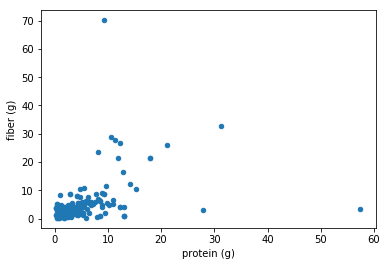

In [30]:
veggie_df.plot.scatter(x='protein (g)', y='fiber (g)'); plt.show();

Write your vegetables dataframe to a TSV file (include your new “healthy” variable and exclude the index)

In [32]:
veggie_df.to_csv('veggie_nutrition.tsv', sep='\t', index=False)